In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
l=['CreditScore','Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']

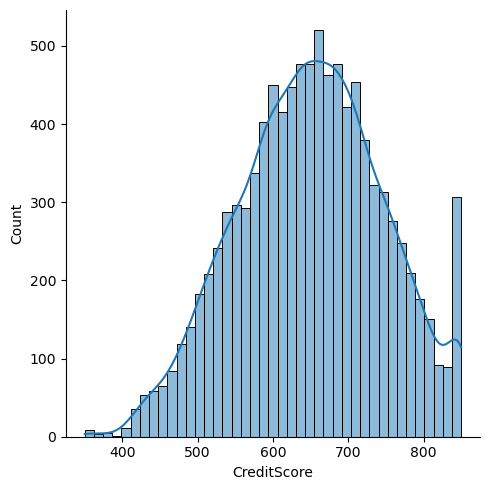

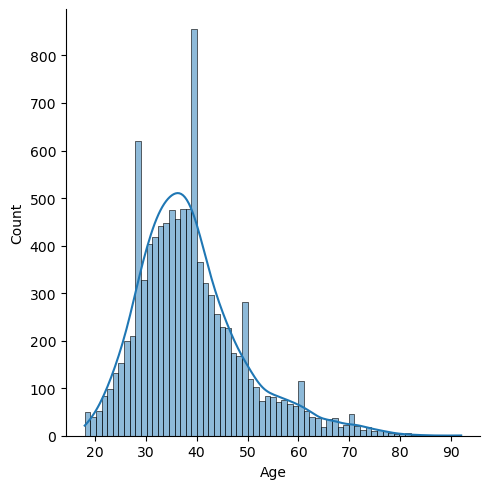

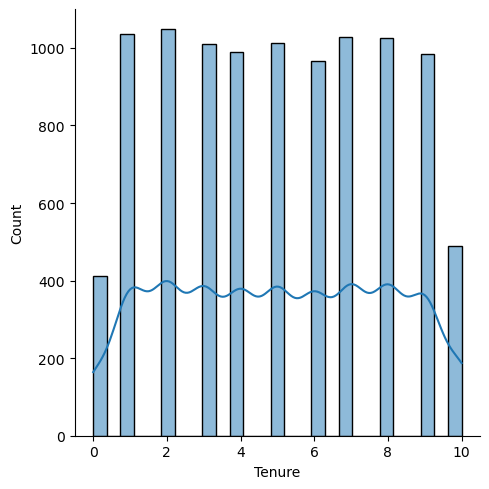

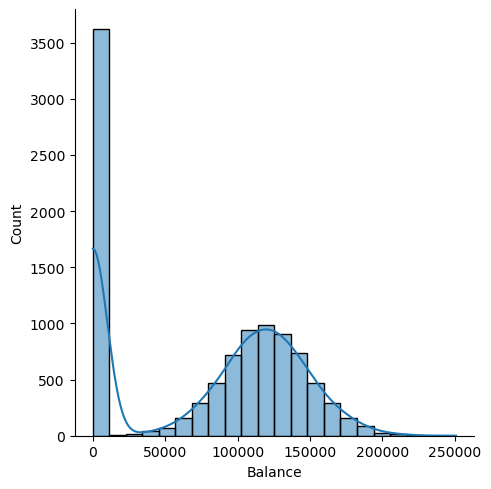

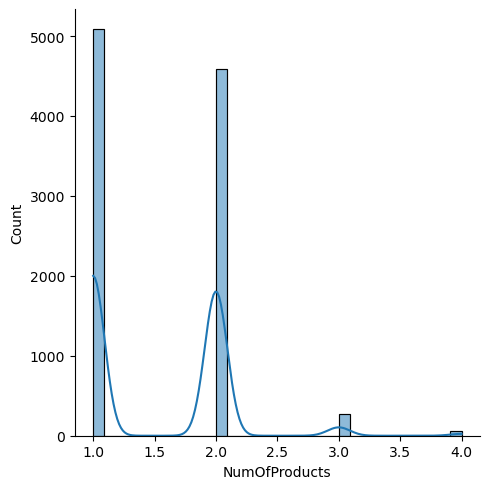

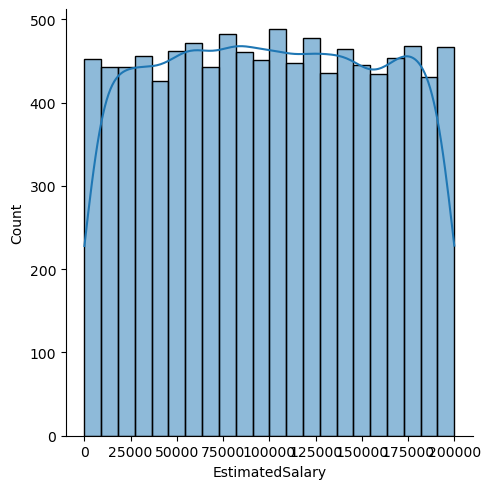

In [4]:
for i in l:
    sns.displot(data=data[i],kde=True)

In [6]:
l=['CreditScore','Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary']
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, figsize=(10,20))
data.boxplot(column=[l[0]],grid='False',color='blue',ax=ax1)
data.boxplot(column=[l[1]],grid='False',color='blue',ax = ax2)
data.boxplot(column=[l[2]],grid='False',color='blue',ax = ax3)
data.boxplot(column=[l[3]],grid='False',color='blue',ax = ax4)
data.boxplot(column=[l[4]],grid='False',color='blue',ax = ax5)
data.boxplot(column=[l[5]],grid='False',color='blue',ax = ax6)
plt.tight_layout()

In [7]:
import warnings
warnings.filterwarnings("ignore")
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(16,16))
sns.countplot(data.HasCrCard,ax=ax1)
sns.countplot(data.IsActiveMember,ax=ax2)
sns.countplot(data.Exited,ax=ax3)
plt.tight_layout()

In [8]:
for i in range(len(l)-1):
    for j in range(i+1,len(l)):
        sns.relplot(x = l[i],y = l[j],data = data)

In [9]:
sns.catplot(x='Gender', y='Age', hue='HasCrCard', data=data)

In [10]:
sns.pairplot(data = data,hue='Exited')

In [11]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [14]:
data.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [15]:
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [16]:
data['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

In [17]:
data['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

data['Balance'].describe()

In [18]:
data['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [19]:
l=['Balance','Age','CreditScore']
for i in l:
    percentile_least = data[i].quantile(0.1)
    percentile90 = data[i].quantile(0.9)
    data = data[(data[i]<percentile90)& (data[i]>percentile_least)]

In [20]:
data['CreditScore'].describe()

count    3354.000000
mean      651.885808
std        66.341508
min       522.000000
25%       601.000000
50%       652.000000
75%       705.000000
max       777.000000
Name: CreditScore, dtype: float64

In [21]:
data['Age'].describe()

count    3354.000000
mean       38.594812
std         6.171482
min        29.000000
25%        34.000000
50%        38.000000
75%        43.000000
max        53.000000
Name: Age, dtype: float64

In [22]:
data['Balance'].describe()

count      3354.000000
mean     111127.251270
std       23930.791436
min        3768.690000
25%       96579.825000
50%      113904.805000
75%      129621.140000
max      149238.970000
Name: Balance, dtype: float64

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in data:
    if data[i].dtype=='object':
        data[i]=encoder.fit_transform(data[i])

In [24]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,645,608,2,0,41,1,83807.86,1,0,1,112542.58,0
5,6,15574012,302,645,2,1,44,8,113755.78,2,1,0,149756.71,1
10,11,15767821,109,528,0,1,31,6,102016.72,2,0,0,80181.12,0
15,16,15643966,561,616,1,1,45,3,143129.41,2,0,1,64327.26,0
26,27,15736816,1605,756,1,1,36,2,136815.64,1,1,1,170041.95,0


In [25]:
data.shape

(3354, 14)

In [26]:
x = data.iloc[:,:13]
y = data.iloc[:,13]

In [27]:
y.head()

1     0
5     1
10    0
15    0
26    0
Name: Exited, dtype: int64

In [28]:
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1,2,15647311,645,608,2,0,41,1,83807.86,1,0,1,112542.58
5,6,15574012,302,645,2,1,44,8,113755.78,2,1,0,149756.71
10,11,15767821,109,528,0,1,31,6,102016.72,2,0,0,80181.12
15,16,15643966,561,616,1,1,45,3,143129.41,2,0,1,64327.26
26,27,15736816,1605,756,1,1,36,2,136815.64,1,1,1,170041.95


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [30]:
x = sc.fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [34]:
x_train.shape

(2683, 13)

In [35]:
y_train.shape

(2683,)

In [36]:
y_test.shape

(671,)